In [7]:
import matplotlib.pyplot as plt
import matplotlib
from numpy import array, linspace
import numpy as np
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.stats import scoreatpercentile
from sklearn.model_selection import GridSearchCV, LeaveOneOut


def bandwidth_silverman(x):
    #Bandwidth estimated by Silverman's Rule of Thumb
    # A = min(std(x, ddof=1), IQR/1.349)
    IQR = np.subtract.reduce(np.percentile(x, [75,25]))
    b=4
    normalize = 1.349
    IQR = (scoreatpercentile(x, 75) - scoreatpercentile(x, 25)) / normalize
    std_dev = np.std(x, axis=0, ddof=1)
    if IQR > 0:
        A = np.minimum(std_dev, IQR)
    else:
        A = std_dev
    b = .9 * A * (n ** (-0.2))
    print("b=", b)
    return b

def bandwidths_grid_search(x):
    bandwidths = linspace(min(x),max(x))
    grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                        param_grid={'bandwidth': bandwidths},
                        cv=15)
    grid.fit(a)

    b = grid.best_params_['bandwidth']
    print("b=", b)
    return b


def KDE(x,b):
    a = array(x).reshape(-1, 1)
    n = len(x)
    #kernel Density 
    kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(a)
    s = linspace(min(x),max(x))
    e = kde.score_samples(s.reshape(-1,1))

    mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
    mins = s[mi]
    print("Mins:", mins)

    # fig, ax = plt.subplots(1, 1)
    # ax2 = ax.twinx()
    # ax3 = ax2.twiny()

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10, 5)

    plt.subplot(1, 2, 1)
    plt.hist(x, bins=30)
    
    plt.subplot(1, 2, 2)
    plt.plot(s,e,
            s[mi], e[mi], 'ro')

    fig.savefig('test2png.png', dpi=100)
    groupings = []
    head_index = []
    for i in range(len(mins)):
      if i==0:
        groupings.append(a[a<mins[i]])
        head_index.append(list(np.where(a<mins[i])[0]))
      elif i==len(mins)-1:  
        groupings.append(a[(a >= mins[i-1]) * (a < mins[i])])
        head_index.append(list(np.where((a >= mins[i-1]) * (a < mins[i]))[0]))
        groupings.append(a[a >= mins[i]])
        head_index.append(list(np.where(a >= mins[i])[0]))
      else:
        groupings.append(a[(a >= mins[i-1]) * (a < mins[i])])
        head_index.append(list(np.where((a >= mins[i-1]) * (a < mins[i]))[0]))
    return head_index

# x = [125, 332, 274, 304, 375, 196, 117, 164, 105, 132, 111, 125, 111, 206, 282, 111, 455, 175,105, 265]
# print(x)
# head_index = KDE(x,b=20)
# print(head_index)

# KDE(x, b= bandwidths_grid_search(x))
# KDE(x, b= bandwidth_silverman(x))

Mins: [129.71428571 186.85714286 284.         329.71428571]
[[0, 6, 8, 9, 10, 11, 12, 17], [5, 7, 13, 16], [1, 2, 3, 14, 18], [4], [15]]
Mins: [124.         186.85714286 255.42857143 284.         329.71428571]
[[0, 6, 8, 9, 10, 11, 12, 17], [5, 7, 13, 16], [2, 3, 14, 18], [1], [4], [15]]


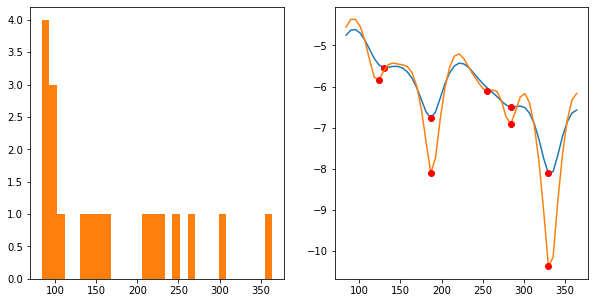

In [39]:
openI_label_couts =  [100, 266, 219, 243, 300, 154, 94, 131, 84, 106, 89, 100, 89, 165, 226, 364, 140, 84, 212]
head_index = KDE(openI_label_couts,b=15)
print(head_index)
head_index = KDE(openI_label_couts,b=10)
print(head_index)

Mins: [ 303.73469388 1104.30612245 2247.97959184]
[[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [2, 3, 4, 5, 6], [1], [0]]


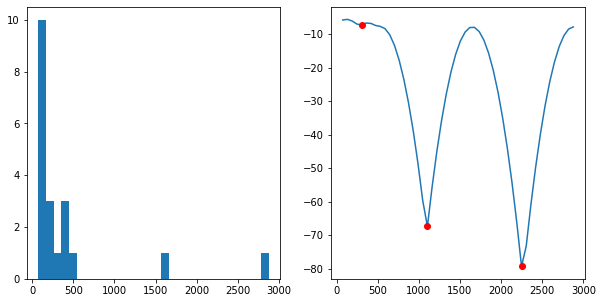

In [26]:
reuters_label_couts =  [2877, 1650, 538, 433, 389, 368, 347, 212, 197, 181, 140, 131, 126, 124, 111, 101, 94, 87, 78, 75]

head_index = KDE(reuters_label_couts,b=50)
print(head_index)

Mins: [ 641.87755102 1091.69387755 1691.44897959 2291.20408163 2741.02040816
 3940.53061224 6339.55102041]
[[7, 10, 11, 21], [0, 3, 5, 14, 15], [2, 4, 9, 22], [1, 8, 17], [13, 19, 20], [18], [12, 16], [6]]


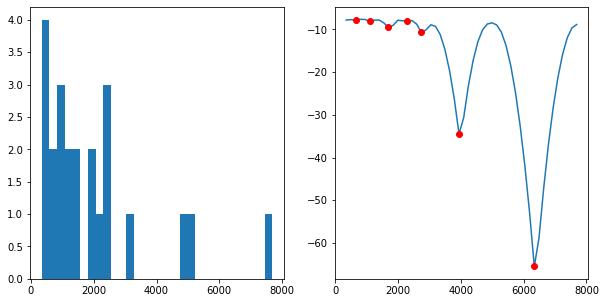

In [33]:
ohsumed_label_couts =  [937, 2071, 1298, 869, 1535, 1022, 7689, 405, 2014, 1342, 421, 342, 5062, 2346, 692, 798, 4882, 2032, 3081, 2493, 2391, 572, 1294]

head_index = KDE(ohsumed_label_couts,b=120)
print(head_index)

Mins: [422.51020408 472.57142857 513.53061224 554.48979592]
[[4], [7], [18], [2], [0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]]
Mins: [417.95918367 513.53061224]
[[4], [7, 18], [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]]


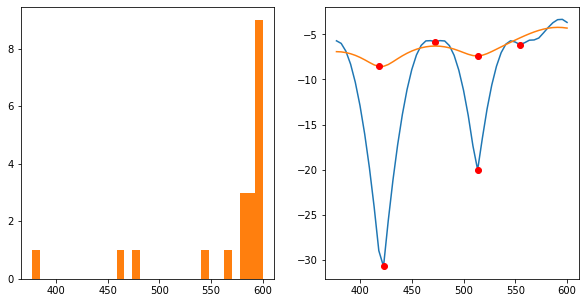

In [38]:
twenty_newsgoup_label_couts =  [593, 597, 546, 599, 377, 595, 594, 465, 591, 594, 578, 585, 600, 591, 593, 598, 564, 584, 480, 590]

head_index = KDE(twenty_newsgoup_label_couts,b=6)
print(head_index)
head_index = KDE(twenty_newsgoup_label_couts,b=20)
print(head_index)